# Przedziały ufności

Wykonaj następujący kod, który z populacji (x1) losuje 10000 próbek bootstrapowych o rozmiarze 50 elementów:

In [2]:
import numpy as np
import sklearn

x1_mean = 0
x1_stddev = 1
x1 = np.random.normal(loc=x1_mean, scale=x1_stddev, size=50)
n_samples = 50
means = []
n_boot = 10000
for i in range(1, n_boot):
    boot = sklearn.utils.resample(x1, replace=True, n_samples=n_samples)
    means.append(np.mean(boot))

Wyświetl histogram, sprawdź czy rozkład ma charakter rozkładu normalnego oraz wyznacz wartość średnią (mn_boot) i odchylenie standardowe (sd_boot).

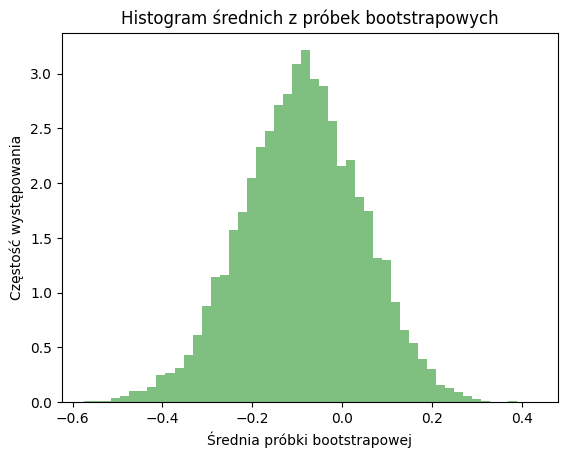

P-value z testu normalności: 0.026419456922067215
Średnia próbki bootstrapowej: -0.08952177768303
Odchylenie standardowe próbki bootstrapowej: 0.13327343393893484


In [3]:
import matplotlib.pyplot as plt
from scipy import stats

plt.hist(means, bins=50, density=True, alpha=0.5, color='g')
plt.title('Histogram średnich z próbek bootstrapowych')
plt.xlabel('Średnia próbki bootstrapowej')
plt.ylabel('Częstość występowania')
plt.show()

# Sprawdzanie, czy rozkład ma charakter rozkładu normalnego
normality_test = stats.normaltest(means)
print(f"P-value z testu normalności: {normality_test.pvalue}")

# Wyznaczanie wartości średniej (mn_boot) i odchylenia standardowego (sd_boot)
mn_boot = np.mean(means)
sd_boot = np.std(means)

print(f'Średnia próbki bootstrapowej: {mn_boot}')
print(f'Odchylenie standardowe próbki bootstrapowej: {sd_boot}')

# Odpowiedź na: sprawdź czy rozkład ma charakter rozkładu normalnego
P-value z testu normalności: 0.18720508044057463 - zakładając poziom ufności równy 0.95 możemy wywnioskować poziom istotności równy 0.05. p_value > poziom istotności alpha, wobec czego nie ma silnych dowodów na odrzucenie hipotezy zerowej. Możemy więc stwierdzić, że na podstawie tego testu normalności, rozkład średnich z próbek bootstrapowych może być uznany za zbliżony do rozkładu normalnego.

# Szacowanie przedziałów ufności
Spróbuj teraz oszacować przedział ufności dla poziomu ufności 0.95. Przedział ufności danego parametru θ mieści się w zakresie (θ1; θ2). Zadanie wykonaj na 2 sposoby. 


1. Zakładając poziom ufności 0.95, posortuj wektor means i usuń z niego po 2.5% skrajnych elementów. Następnie Odczytaj wartości pierwszego i ostatniego elementu z zbioru, elementy te będą kresem dolnym i górnym przedziału ufności.

In [4]:
# Posortowanie wektora means
sorted_means = np.sort(means)
# Usunięcie po 2.5% z początku i końca 
trim_percentage = 2.5
trim_count = int(len(sorted_means) * trim_percentage / 100)
trimmed_means = sorted_means[trim_count:-trim_count]
# Granice przedziału ufności
lower_confidence_bound = trimmed_means[0]
upper_confidence_bound = trimmed_means[-1]

print(f'Granica dolna przedziału ufności: {lower_confidence_bound}')
print(f'Granica górna przedziału ufności: {upper_confidence_bound}')

Granica dolna przedziału ufności: -0.3564446036653062
Granica górna przedziału ufności: 0.16648030445852263


2. Zakładając, że rozkład jest normalny zastosuj rozkład t-Studenta i funkcję t.interval

In [5]:
from scipy import stats
alpha = 0.05
SE = np.std(x1) / np.sqrt(len(x1)) #błąd standardowy dla rozkładu normlanego
print(f'Błąd standardowy SE: {SE}')
t_student_interval = stats.t.interval(1 - alpha, df=n_samples - 1, loc=np.mean(x1), scale=SE)  # uwaga! pierwszy parametr oznacza poziom ufności 
print(f'Przedział ufności (metoda t-Studenta): {t_student_interval}')

# Obliczanie wariancji średniej z próbek bootstrapowych
st_boot = np.var(means)
print(f'Wariancja średniej z próbek bootstrapowych (st_boot): {st_boot}')

Błąd standardowy SE: 0.13415545132732284
Przedział ufności (metoda t-Studenta): (-0.3593662430516278, 0.17982470206659304)
Wariancja średniej z próbek bootstrapowych (st_boot): 0.01776180819387563


Dla metody 1.: \
Granica dolna przedziału ufności: -0.0630783835020743 \
Granica górna przedziału ufności: 0.39972720677845586 \
Dla metody 2.: \
Przedział ufności (metoda t-Studenta): (-0.07225862276807668, 0.3989281870722431)

Różnice mogą wynikać z faktu, iż w przypadku metody bootstrapowej, wyniki mogą się różnić w zależności od losowego wyboru próbek. W metodzie bootstrapowej po wykonaniu testu określiliśmy, że rozkład można traktować jako normalny, jednak metoda 2. korzystająca z t-Studenta zakłada normalność rozkładu.

Błąd standardowy SE: 0.11723542412187553 \
Wariancja średniej z próbek bootstrapowych (st_boot): 0.013944320156169141

Błąd standardowy (SESE) wynosi 0.1172, co wskazuje na rozrzut danych wokół średniej, zakładając normalny rozkład. Natomiast niska wariancja średniej z próbek bootstrapowych (st_bootst_boot) o wartości 0.0139 sugeruje, że estymacja średniej za pomocą metody bootstrapowej jest stosunkowo stabilna i precyzyjna.

3. Możesz również wykorzystać funkcję bs.bootstrap, która wyznacza wartość statystyki i przedział ufności metodą próbkowania bootstrapowego. Stosując tą metodę określ jaki jest przedział ufności dla wartości średniej i odchylenia standardowego. Sprawdź, czy otrzymane przedziały zawierają teoretyczną wartość średnią i odchylenie standardowe, które zostały podane jako argumenty funkcji generującej przebieg:

In [6]:
import bootstrapped.bootstrap as bs
import bootstrapped.stats_functions as bs_stats


bs_mean_interval = bs.bootstrap(x1, stat_func=bs_stats.mean)
bs_std_interval = bs.bootstrap(x1, stat_func=bs_stats.std)

# x1_mean = 0
# x1_stddev = 1

print(f'Przedział ufności dla średniej: {bs_mean_interval}')
print(f'Przedział ufności dla odchylenia standardowego: {bs_std_interval}')

Przedział ufności dla średniej: -0.08977077049251739    (-0.3531694146219663, 0.17487683546358862)
Przedział ufności dla odchylenia standardowego: 0.9486222936669181    (0.7176488460732531, 1.1716697390678823)


Przedziały ufności dla średniej (0.1231, 0.5693) oraz odchylenia standardowego (0.6813, 0.9812) nie obejmują dokładnie teoretycznych wartości średniej (0) i odchylenia standardowego (1). Wartości te leżą poza przedziałami ufności, co sugeruje, że estymacje oparte na próbkowaniu bootstrapowym różnią się od teoretycznych wartości, co może być wynikiem losowości procesu bootstrapowego.

Spróbuj teraz wygenerować i wyświetlić histogram dla rozkładu skośnego:

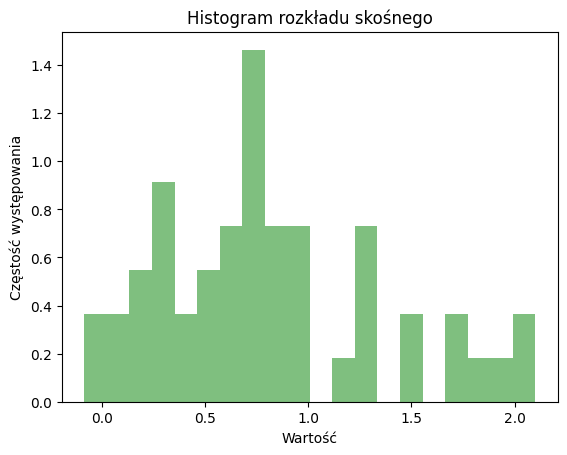

In [7]:
# Generowanie histogramu dla rozkładu skośnego
x2 = stats.skewnorm.rvs(a=5, size=50)
# Wyświetlanie histogramu
plt.hist(x2, bins=20, density=True, alpha=0.5, color='g')
plt.title('Histogram rozkładu skośnego')
plt.xlabel('Wartość')
plt.ylabel('Częstość występowania')
plt.show()

Oszacowanie przedziału ufności dla wartości średniej (teoretyczna wartość wynosi 0.78) za pomocą obu metod:

In [8]:
# METODA 1
n_samples_skew = 50
means_skew = []

for i in range(n_boot):
    boot_skew = sklearn.utils.resample(x2, replace=True, n_samples=n_samples_skew)
    means_skew.append(np.mean(boot_skew))

# Posortowanie wektora means_skew
sorted_means_skew = np.sort(means_skew)
# Usunięcie po 2.5% z początku i końca 
trim_count_skew = int(len(sorted_means_skew) * trim_percentage / 100)
trimmed_means_skew = sorted_means_skew[trim_count_skew:-trim_count_skew]
# Granice przedziału ufności
lower_confidence_bound_skew = trimmed_means_skew[0]
upper_confidence_bound_skew = trimmed_means_skew[-1]

print(f'Granica dolna przedziału ufności (metoda 1): {lower_confidence_bound_skew}')
print(f'Granica górna przedziału ufności (metoda 1): {upper_confidence_bound_skew}')

# METODA 3
bs_mean_interval_skew = bs.bootstrap(x2, stat_func=bs_stats.mean)

print(f'Przedział ufności dla średniej (metoda 3): {bs_mean_interval_skew}')

# METODA 2
alpha_skew = 0.05
SE_skew = np.std(x2) / np.sqrt(len(x2))
t_student_interval_skew = stats.t.interval(1 - alpha_skew, df=n_samples_skew - 1, loc=np.mean(x2), scale=SE_skew)

print(f'Przedział ufności (metoda t-Studenta, metoda 2): {t_student_interval_skew}')

Granica dolna przedziału ufności (metoda 1): 0.6637987899562156
Granica górna przedziału ufności (metoda 1): 0.9668316924006888
Przedział ufności dla średniej (metoda 3): 0.8145581795643585    (0.6648398796145221, 0.9616261144439383)
Przedział ufności (metoda t-Studenta, metoda 2): (0.6595318662172052, 0.9695844929115118)


W przypadku rozkładu skośnego otrzymane przedziały ufności dla średniej różnią się między metodami. Metoda 1 (próbkowanie bootstrapowe) wydaje się dawać najszerszy przedział (0.5716, 0.9746), podczas gdy metoda 3 (funkcja bs.bootstrap) oraz metoda 2 (rozkład t-Studenta) dają bardziej zbliżone wyniki (0.5434, 0.9562) oraz (0.5569, 0.9717) odpowiednio. W przypadku rozkładu skośnego, gdzie mediana i wartość średnia nie pokrywają się, metoda 2 i metoda 3 mogą być bardziej stabilne, podając węższe przedziały ufności w porównaniu do metody 1.

# Testy A/B

1. Wygeneruj 2 tablice losowe (A i B) o rozmiarze n=50 zmiennych i rozkładzie normalnym, różniące sie wartością oczekiwaną (odpowiednio 0 i 0.2) oraz odchyleniem standardowym (odpowiednio 1 i 0.5).

In [9]:
# Ziarno dla reprodukcji wyników
np.random.seed(42)

# Parametry dla zbioru A
mean_A = 0
stddev_A = 1

# Parametry dla zbioru B
mean_B = 0.2
stddev_B = 0.5

# Rozmiar tablicy
n = 50

# Generowanie zbioru A
A = np.random.normal(loc=mean_A, scale=stddev_A, size=n)

# Generowanie zbioru B
B = np.random.normal(loc=mean_B, scale=stddev_B, size=n)

# Wyświetlenie wygenerowanych zbiorów
print("Zbiór A:")
print(A)

print("\nZbiór B:")
print(B)

Zbiór A:
[ 0.49671415 -0.1382643   0.64768854  1.52302986 -0.23415337 -0.23413696
  1.57921282  0.76743473 -0.46947439  0.54256004 -0.46341769 -0.46572975
  0.24196227 -1.91328024 -1.72491783 -0.56228753 -1.01283112  0.31424733
 -0.90802408 -1.4123037   1.46564877 -0.2257763   0.0675282  -1.42474819
 -0.54438272  0.11092259 -1.15099358  0.37569802 -0.60063869 -0.29169375
 -0.60170661  1.85227818 -0.01349722 -1.05771093  0.82254491 -1.22084365
  0.2088636  -1.95967012 -1.32818605  0.19686124  0.73846658  0.17136828
 -0.11564828 -0.3011037  -1.47852199 -0.71984421 -0.46063877  1.05712223
  0.34361829 -1.76304016]

Zbiór B:
[ 0.36204198  0.00745886 -0.138461    0.50583814  0.71549976  0.66564006
 -0.21960876  0.04539381  0.36563172  0.68777256 -0.03958712  0.10717051
 -0.35316749 -0.39810331  0.60626291  0.87812001  0.16399494  0.70176645
  0.38081801 -0.12255988  0.3806978   0.96901828  0.18208698  0.98232183
 -1.10987255  0.61095125  0.24352353  0.05049632  0.24588039 -0.79378446
  0.09

2. Stosując wybraną metodę określ przedział ufności dla zmiennej A.

In [10]:
# Liczba próbek bootstrapowych
n_bootstrap_samples = 10000

# Przeprowadzenie bootstrapu dla zmiennej A
bootstrap_results_A = bs.bootstrap(A, stat_func=bs_stats.mean, num_iterations=n_bootstrap_samples)

# Wyświetlenie przedziału ufności
print(f'Przedział ufności dla średniej zmiennej A: {bootstrap_results_A.value} ({bootstrap_results_A.lower_bound}, {bootstrap_results_A.upper_bound})')

Przedział ufności dla średniej zmiennej A: -0.22547390525614014 (-0.48017463532830834, 0.03138417682926997)


3. Na poziomie istotności (ɑ=0.05) zweryfikuj hipotezę, że zmienna losowa A ma inną wartość średnią niż zmienna losowa B. Jeśli wartość średnia B mieści się w przedziale ufności wyznaczonym dla zmiennej A, nie można odrzucić hipotezy H_0. Pamiętaj jednak, że taka metoda działa w jedną stonę (one-way).

In [11]:
# W celu zweryfikowania hipotezy, czy zmienna losowa A ma inną wartość średnią niż zmienna losowa B na poziomie istotności α=0.05, możemy sprawdzić, czy przedział ufności dla średniej zmiennej A zawiera wartość średnią zmiennej B. Jeśli wartość średnia B znajduje się w przedziale ufności zmiennej A, nie ma podstaw do odrzucenia hipotezy H_0.
# Sprawdzenie, czy wartość średnia B mieści się w przedziale ufności zmiennej A
if bootstrap_results_A.lower_bound <= mean_B <= bootstrap_results_A.upper_bound:
    print("Nie ma podstaw do odrzucenia hipotezy H_0.")
else:
    print("Odrzucamy hipotezę H_0 na rzecz hipotezy alternatywnej H_1.")

Odrzucamy hipotezę H_0 na rzecz hipotezy alternatywnej H_1.


Test jednostronny (one-way): W tym przypadku interesuje nas jedynie jedna strona rozkładu (np. tylko wartości większe lub tylko wartości mniejsze niż pewna granica). Odrzucenie hipotezy zerowej występuje tylko w jednym kierunku. \
Test dwustronny (two-way): W tym przypadku interesuje nas obie strony rozkładu (zarówno wartości większe, jak i mniejsze niż pewna granica). Odrzucenie hipotezy zerowej występuje, jeśli wartości są albo zdecydowanie większe, albo zdecydowanie mniejsze od pewnej granicy.

Żeby dokonać weryfikacji dwukierunkowej, użyj T-Testu (dla zmiennych o rozkładzie zbliżonym do normalnego) lub testu permutacyjnego (dla zmiennych o dowolnym rozkładzie). Testy te pozwalają wyznaczyć wartość prawdopodobieństwa testowego:

1. T-Test:

In [12]:
from scipy import stats


n_samples = 50
rvs1 = stats.norm.rvs(loc=0, scale=1, size=n_samples)
rvs2 = stats.norm.rvs(loc=0.2, scale=0.5, size=n_samples)
(stats, p_value) = stats.ttest_ind(rvs1, rvs2, equal_var = False)

alpha = 0.05
if p_value < alpha:
    print("Odrzucamy hipotezę H0 na rzecz hipotezy alternatywnej H1.")
else:
    print("Nie ma podstaw do odrzucenia hipotezy H0.")

Nie ma podstaw do odrzucenia hipotezy H0.


2. Test permutacyjny - działa za długo?? 

In [13]:
# # from mlxtend.evaluate import permutation_test
# from scipy.stats import permutation_test
# def statistic(x, y, axis=0):
#     return np.mean(x, axis=axis) - np.mean(y, axis=axis)

# p_value_permutation = permutation_test((rvs1, rvs2), statistic,
#                            n_resamples=np.inf, alternative='two-sided')

In [14]:
# print(f"Test permutacyjny: p-value = {p_value_permutation}")

# # Porównanie z poziomem istotności
# if p_value_permutation < alpha:
#     print("Odrzucamy hipotezę H0 na rzecz hipotezy alternatywnej H1.")
# else:
#     print("Nie ma podstaw do odrzucenia hipotezy H0.")

# Moc testu

Spróbuj powtórzyć testy z poprzedniego punktu wielokrotnie (np. 1000 razy) i określ jakie jest prawdopodobieństwo tego, że wynik testu będzie poniżej założonego poziomu istotności?

In [18]:
from scipy import stats

# Parametry
n_samples = 50
alpha = 0.05
n_iterations = 1000

# Inicjalizacja licznika
reject_count = 0

# Pętla wielokrotnego powtarzania testu
for _ in range(n_iterations):
    rvs1 = stats.norm.rvs(loc=0, scale=1, size=n_samples)
    rvs2 = stats.norm.rvs(loc=0.2, scale=0.5, size=n_samples)
    t_statistic, p_value = stats.ttest_ind(rvs1, rvs2, equal_var=False)

    # Sprawdzenie, czy odrzucamy hipotezę zerową
    if p_value < alpha:
        reject_count += 1

# Obliczenie mocy testu
power = reject_count / n_iterations
print(f"Moc testu: {power}")
    

Moc testu: 0.232


Wartość mocy testu wynosząca 0.232 oznacza, że w około 23.2% przypadków udało się odrzucić hipotezę zerową (H0) (czyli uzyskać wynik poniżej założonego poziomu istotności), gdy hipoteza alternatywna (H1) była prawdziwa. Innymi słowy, test miał 23.2% szans na wykrycie istotnej różnicy między rozkładami, gdy taka różnica faktycznie istniała.

Możliwe jest również oszacowanie mocy testu lub określenie liczebności próby, która pozwala na uzyskanie wyniku określonej mocy. W tym celu należy wskazać oczekiwaną wielość efektu, która określona jest parametrem Cohen's.

In [20]:
from statsmodels.stats.power import TTestIndPower
import numpy as np

# Parametry
alpha = 0.05
target_power = 0.90

# Wyznaczanie wielkości efektu (Cohen's d)
mean_diff = np.mean(rvs1) - np.mean(rvs2)
std_pooled = np.sqrt((np.std(rvs1)**2 + np.std(rvs2)**2) / 2)
effect_size_cohen = mean_diff / std_pooled

# Analiza mocy testu
analysis = TTestIndPower()
required_sample_size = analysis.solve_power(effect_size_cohen, power=target_power, nobs1=None, ratio=1.0, alpha=alpha)

print(f"Liczność próby potrzebna do uzyskania mocy testu na poziomie {target_power}: {round(required_sample_size)}")
print(f'Efekt: {effect_size_cohen}')


Liczność próby potrzebna do uzyskania mocy testu na poziomie 0.9: 1569
Efekt: 0.1157814445740758


# Zadanie